In [14]:
from qiskit import QuantumRegister, QuantumCircuit, execute
from qiskit.quantum_info.operators import Operator
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit import Aer
import numpy as np
from math import sin, cos, atan2
import matplotlib.pyplot as plt
from numpy.linalg import norm,svd

In [15]:
def two_qubit_state(ckt,A):
    A=np.transpose(np.reshape(A,(2,2)))
    U,S,V=np.linalg.svd(A)

    ckt.u3(2*atan2(S[1],S[0]),0,0,0)
    ckt.cx(0,1)
    ckt.unitary(Operator(U), [0])
    ckt.unitary(Operator(np.transpose(V)), [1])
    ckt.barrier()
    
    return ckt

In [16]:
A=np.random.rand(4,2)
A=A/np.linalg.norm(A)
print(A**2,round(np.sum(A**2),2))

U,S,V=np.linalg.svd(A)
print(np.shape(U),np.shape(V))
print(S)

[[0.01797748 0.28986195]
 [0.10061322 0.01335423]
 [0.01341179 0.31666365]
 [0.06174712 0.18637056]] 1.0
(4, 4) (2, 2)
[0.95698801 0.29012748]


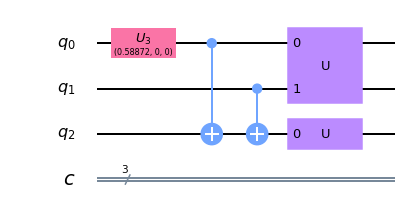

In [17]:
ckt=QuantumCircuit(3,3)
ckt.u3(2*atan2(S[1],S[0]),0,0,0)
ckt.cx(0,2)
ckt.cx(1,2)
ckt.unitary(Operator(U), [0,1])
ckt.unitary(Operator(np.transpose(V)), [2])
#ckt.measure([0,1,2,3],[0,1,2,3])
ckt.draw(output='mpl')

In [26]:
backend = Aer.get_backend('statevector_simulator')
job=execute(ckt,backend)
result = job.result()
outputstate = result.get_statevector(ckt, decimals=3)

print(np.transpose(np.reshape(np.real(outputstate),(2,4))))
print(np.round(A,3),'\n')

[[0.134 0.538]
 [0.317 0.116]
 [0.116 0.563]
 [0.248 0.432]]
[[0.134 0.538]
 [0.317 0.116]
 [0.116 0.563]
 [0.248 0.432]] 



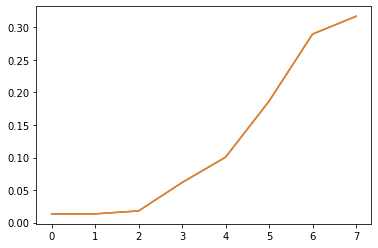

In [19]:
plt.plot(np.sort(np.real(outputstate**2)))
plt.plot(np.sort(np.reshape(A**2,-1)))

In [20]:
'''backend = Aer.get_backend('qasm_simulator')
job_sim = execute(ckt,backend,shots=100000)
result_sim = job_sim.result()
counts = result_sim.get_counts(ckt)
print(np.round(A**2,3))
plot_state_city(result_sim.get_statevector)'''

"backend = Aer.get_backend('qasm_simulator')\njob_sim = execute(ckt,backend,shots=100000)\nresult_sim = job_sim.result()\ncounts = result_sim.get_counts(ckt)\nprint(np.round(A**2,3))\nplot_state_city(result_sim.get_statevector)"